In [1]:
classes=    [( 0, b'Speed limit (20km/h)'), 
    ( 1, b'Speed limit (30km/h)') ,
    ( 2, b'Speed limit (50km/h)') ,
    ( 3, b'Speed limit (60km/h)') ,
    ( 4, b'Speed limit (70km/h)') ,
    ( 5, b'Speed limit (80km/h)') ,
    ( 6, b'End of speed limit (80km/h)') ,
    ( 7, b'Speed limit (100km/h)') ,
    ( 8, b'Speed limit (120km/h)') ,
    ( 9, b'No passing') ,
    (10, b'No passing for vehicles over 3.5 metric tons') ,
    (11, b'Right-of-way at the next intersection') ,
    (12, b'Priority road') ,
    (13, b'Yield') ,
    (14, b'Stop') ,
    (15, b'No vehicles') ,
    (16, b'Vehicles over 3.5 metric tons prohibited') ,
    (17, b'No entry'),
    (18, b'General caution') ,
    (19, b'Dangerous curve to the left'),
    (20, b'Dangerous curve to the right'), 
    (21, b'Double curve'),
    (22, b'Bumpy road') ,
    (23, b'Slippery road'),
    (24, b'Road narrows on the right') ,
    (25, b'Road work'),
    (26, b'Traffic signals') ,
    (27, b'Pedestrians') ,
    (28, b'Children crossing'),
    (29, b'Bicycles crossing') ,
    (30, b'Beware of ice/snow'),
    (31, b'Wild animals crossing'),
    (32, b'End of all speed and passing limits') ,
    (33, b'Turn right ahead'),
    (34, b'Turn left ahead') ,
    (35, b'Ahead only') ,
    (36, b'Go straight or right'),
    (37, b'Go straight or left') ,
    (38, b'Keep right') ,
    (39, b'Keep left'),
    (40, b'Roundabout mandatory') ,
    (41, b'End of no passing'),
    (42, b'End of no passing by vehicles over 3.5 metric tons')]


In [2]:
classes = dict(classes)
classes

{0: b'Speed limit (20km/h)',
 1: b'Speed limit (30km/h)',
 2: b'Speed limit (50km/h)',
 3: b'Speed limit (60km/h)',
 4: b'Speed limit (70km/h)',
 5: b'Speed limit (80km/h)',
 6: b'End of speed limit (80km/h)',
 7: b'Speed limit (100km/h)',
 8: b'Speed limit (120km/h)',
 9: b'No passing',
 10: b'No passing for vehicles over 3.5 metric tons',
 11: b'Right-of-way at the next intersection',
 12: b'Priority road',
 13: b'Yield',
 14: b'Stop',
 15: b'No vehicles',
 16: b'Vehicles over 3.5 metric tons prohibited',
 17: b'No entry',
 18: b'General caution',
 19: b'Dangerous curve to the left',
 20: b'Dangerous curve to the right',
 21: b'Double curve',
 22: b'Bumpy road',
 23: b'Slippery road',
 24: b'Road narrows on the right',
 25: b'Road work',
 26: b'Traffic signals',
 27: b'Pedestrians',
 28: b'Children crossing',
 29: b'Bicycles crossing',
 30: b'Beware of ice/snow',
 31: b'Wild animals crossing',
 32: b'End of all speed and passing limits',
 33: b'Turn right ahead',
 34: b'Turn left ahe

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle  # to load data.

# Import datasets

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:   # To train the model
    train = pickle.load(training_data)  
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:  # To validate model
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:   # To test the model
    test = pickle.load(testing_data)

In [5]:
test

{'sizes': array([[53, 54],
        [42, 45],
        [48, 52],
        ...,
        [29, 29],
        [48, 49],
        [32, 31]], dtype=uint8), 'coords': array([[ 6,  5, 48, 49],
        [ 5,  5, 36, 40],
        [ 6,  6, 43, 47],
        ...,
        [ 6,  6, 24, 24],
        [ 5,  6, 43, 44],
        [ 6,  5, 27, 26]], dtype=uint8), 'features': array([[[[116, 139, 174],
          [116, 137, 171],
          [118, 138, 172],
          ...,
          [ 98, 114, 143],
          [ 97, 121, 147],
          [ 85, 105, 130]],
 
         [[115, 142, 176],
          [115, 140, 174],
          [117, 141, 175],
          ...,
          [119, 143, 176],
          [120, 141, 173],
          [120, 139, 171]],
 
         [[117, 141, 174],
          [117, 142, 175],
          [114, 140, 172],
          ...,
          [120, 144, 179],
          [122, 144, 179],
          [120, 143, 177]],
 
         ...,
 
         [[117, 137, 167],
          [115, 134, 164],
          [117, 135, 164],
          ...,

In [3]:
X_train , y_train = train['features'] , train['labels'] 
X_val , y_val = valid['features'] , valid['labels']
X_test , y_test = test['features'] , test['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
X_val.shape

(4410, 32, 32, 3)

In [9]:
X_test.shape

(12630, 32, 32, 3)

# Image Exploration

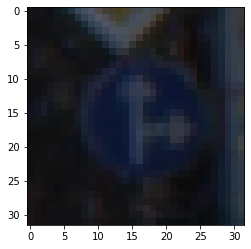

In [10]:
plt.imshow(X_train[1000])

In [11]:
y_train[1000]

36

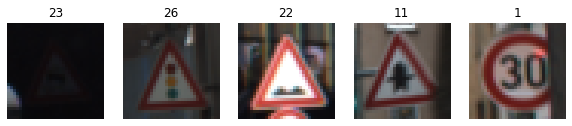

In [12]:
# Randomly checking images.

fig , axes = plt.subplots(nrows=1 , ncols=5 , figsize=(10,10))
axes = axes.ravel()  # Converts matrix into 1D array

for i in np.arange(0,5):
    index = np.random.randint(0,len(X_train))  # Pick a random number
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])  # prints label coresponding to image
    axes[i].axis('off')  # Removing axes for images. 
    
plt.subplots_adjust(hspace=0.4)  # Expanding space between images

# Data Preparation

In [4]:
# Shuffling images

from sklearn.utils import shuffle

X_train , y_train = shuffle(X_train,y_train) 

In [5]:
# Since le-net takes gray scale images as inputs, converting images in training data to gray scale

X_train_gray = np.sum(X_train/3 , axis=3 , keepdims=True)
X_val_gray = np.sum(X_val/3 , axis=3 , keepdims=True)
X_test_gray = np.sum(X_test/3 , axis=3 , keepdims=True)

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

In [16]:
X_val_gray.shape

(4410, 32, 32, 1)

In [17]:
X_test_gray.shape

(12630, 32, 32, 1)

In [6]:
# Normalising training , validation and testing images 

X_train_gray_norm = (X_train_gray - 128) / 128
X_val_gray_norm = (X_val_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128

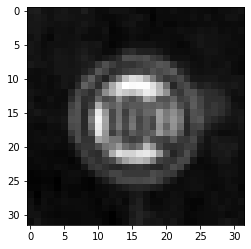

In [19]:
plt.imshow(X_train_gray_norm[610].squeeze() , cmap='gray')

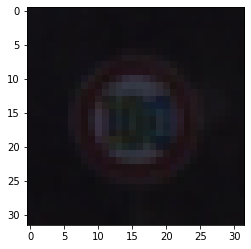

In [20]:
plt.imshow(X_train[610])

In [21]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

# Model Building

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [7]:
# importing libraries

from keras.models import Sequential   # Topology of network
from keras.layers import Conv2D , MaxPooling2D  , AveragePooling2D , Dense , Flatten , Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


Using TensorFlow backend.


In [8]:
model = Sequential()


# Step - 1
model.add(Conv2D(kernel_size=(5,5) , filters=6 , activation='relu' , input_shape=(32,32,1)))
model.add(AveragePooling2D())

# Step - 2
model.add(Conv2D(kernel_size=(5,5) , filters=16 , activation='relu'))
model.add(AveragePooling2D())

# Step - 3
model.add(Flatten())

# Step - 4
model.add(Dense(units=120 , activation='relu'))

# Step - 5
model.add(Dense(units=84 , activation='relu'))

# Step - 6
model.add(Dense(units=43 , activation='softmax'))

W0807 14:38:37.301828 140020327724864 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:72: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 14:38:37.321450 140020327724864 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:515: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 14:38:37.325247 140020327724864 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4048: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 14:38:37.342421 140020327724864 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3882: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



# Compiling model

In [9]:
model.compile(loss='sparse_categorical_crossentropy' , optimizer=Adam(lr=0.01) , metrics=['accuracy'])

W0807 14:38:37.434186 140020327724864 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/optimizers.py:782: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 14:38:37.440826 140020327724864 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3264: The name tf.log is deprecated. Please use tf.math.log instead.



# Training model

In [10]:
history = model.fit(x = X_train_gray_norm , y = y_train , batch_size=500 , epochs=10 , verbose=1,
         validation_data=(X_val_gray_norm , y_val))

W0807 14:38:37.565066 140020327724864 deprecation.py:323] From /usr/local/anaconda/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0807 14:38:37.618630 140020327724864 deprecation_wrapper.py:119] From /usr/local/anaconda/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:984: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 4s 112us/step - loss: 2.1336 - acc: 0.4091 - val_loss: 1.0719 - val_acc: 0.6580
Epoch 2/10
34799/34799 [==============================] - 3s 95us/step - loss: 0.4687 - acc: 0.8594 - val_loss: 0.7060 - val_acc: 0.7914
Epoch 3/10
34799/34799 [==============================] - 3s 96us/step - loss: 0.2083 - acc: 0.9416 - val_loss: 0.5288 - val_acc: 0.8610
Epoch 4/10
34799/34799 [==============================] - 3s 95us/step - loss: 0.1346 - acc: 0.9620 - val_loss: 0.6033 - val_acc: 0.8560
Epoch 5/10
34799/34799 [==============================] - 3s 94us/step - loss: 0.0889 - acc: 0.9745 - val_loss: 0.4934 - val_acc: 0.8941
Epoch 6/10
34799/34799 [==============================] - 3s 94us/step - loss: 0.0629 - acc: 0.9828 - val_loss: 0.5198 - val_acc: 0.9000
Epoch 7/10
34799/34799 [==============================] - 4s 103us/step - loss: 0.0505 - acc: 0.9855 - val_loss: 0.4635 - val_ac

# Evaluating model on test data

In [11]:
evaluate = model.evaluate(X_test_gray_norm , y_test)

12630/12630 [==============================] - 1s 90us/step


In [12]:
print('Accuracy on test data is {}'.format(evaluate[1]))

Accuracy on test data is 0.8921615201805851


In [15]:
history.history['val_acc']

[0.7517006893276897,
 0.848752832331625,
 0.8766439824688191,
 0.8818594067275118,
 0.8741496622967883,
 0.911564620849497,
 0.9283446773650155,
 0.9215419584391068,
 0.9199546463365187,
 0.9108843547957284]

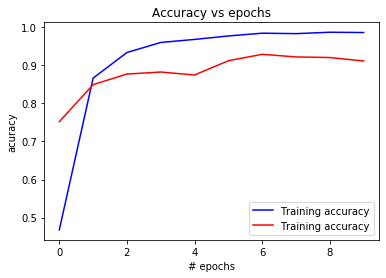

In [16]:
accuracy = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_los = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs , accuracy , 'b-' , label = 'Training accuracy')
plt.plot(epochs , val_acc , 'r-' , label = 'Training accuracy')
plt.xlabel('# epochs')
plt.ylabel('acuracy')
plt.title('Accuracy vs epochs')
plt.legend()

Observation - Initial training accuracy was low but gradually increased as more number of training samples is used to train model.

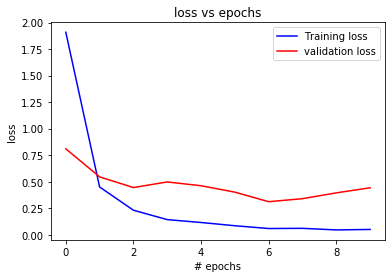

In [18]:
plt.plot(epochs , loss , 'b-' , label = 'Training loss')
plt.plot(epochs , val_los , 'r-' , label = 'validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.legend()

# Predictions

In [13]:
predicted_classes = model.predict_classes(X_test_gray_norm)

# Plotting predictions

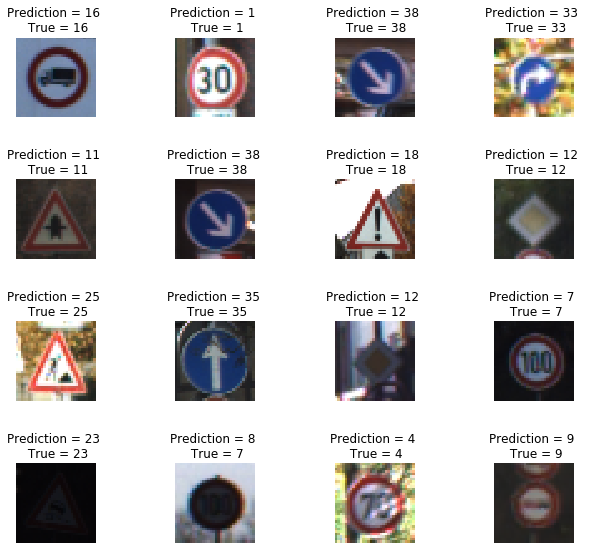

In [14]:
fig , axes = plt.subplots(4,4,figsize=(10,10))
axes = axes.ravel()

for i in range(0,16):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n True = {}'.format(predicted_classes[i] , y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)